In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('/Users/noeltiju/Desktop/ML-Project/ELO-Insights/training_dataset.csv')

# Reset the index to convert the MultiIndex into columns
dataset = dataset.reset_index()

col_names = ['Home_Team_Rating', 'Away_Team_Rating', 'Winner']

dataset = dataset[col_names]
dataset = dataset[dataset['Winner'] != 0] # Remove draws

dataset.head()

,Home_Team_Rating,Away_Team_Rating,Winner
0,1516,1484,1
1,1516,1484,1
2,1516,1484,1
4,1484,1516,-1
9,1516,1484,1


In [4]:
features = ['Home_Team_Rating', 'Away_Team_Rating']
target = 'Winner'

X = dataset[features]
y = dataset[target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [6]:
logistic_regression_model = LogisticRegression(random_state=16)

# fit the model with data
logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7496641289744738


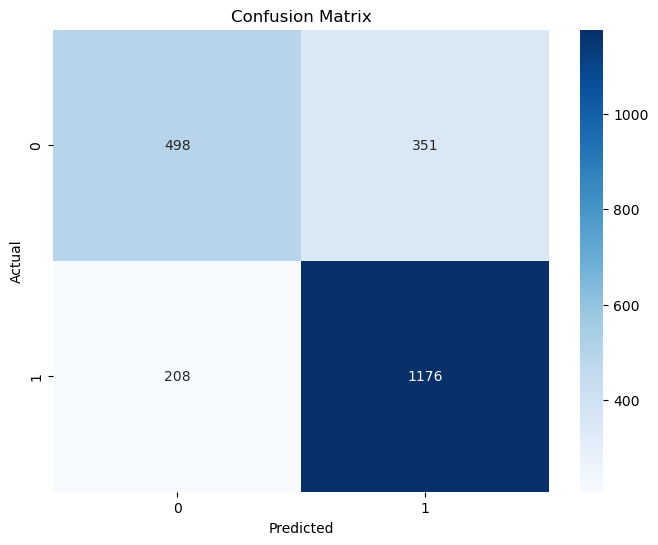

In [7]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()